In [1]:
### Curso de Python para Finanças Quantitativas

#### Aula 9 - Estratégia do Diamante
#### Autor: Leandro Guerra - Outspoken Market
#### Download em: https://www.outspokenmarket.com/pythonfinancasquantitativas.html

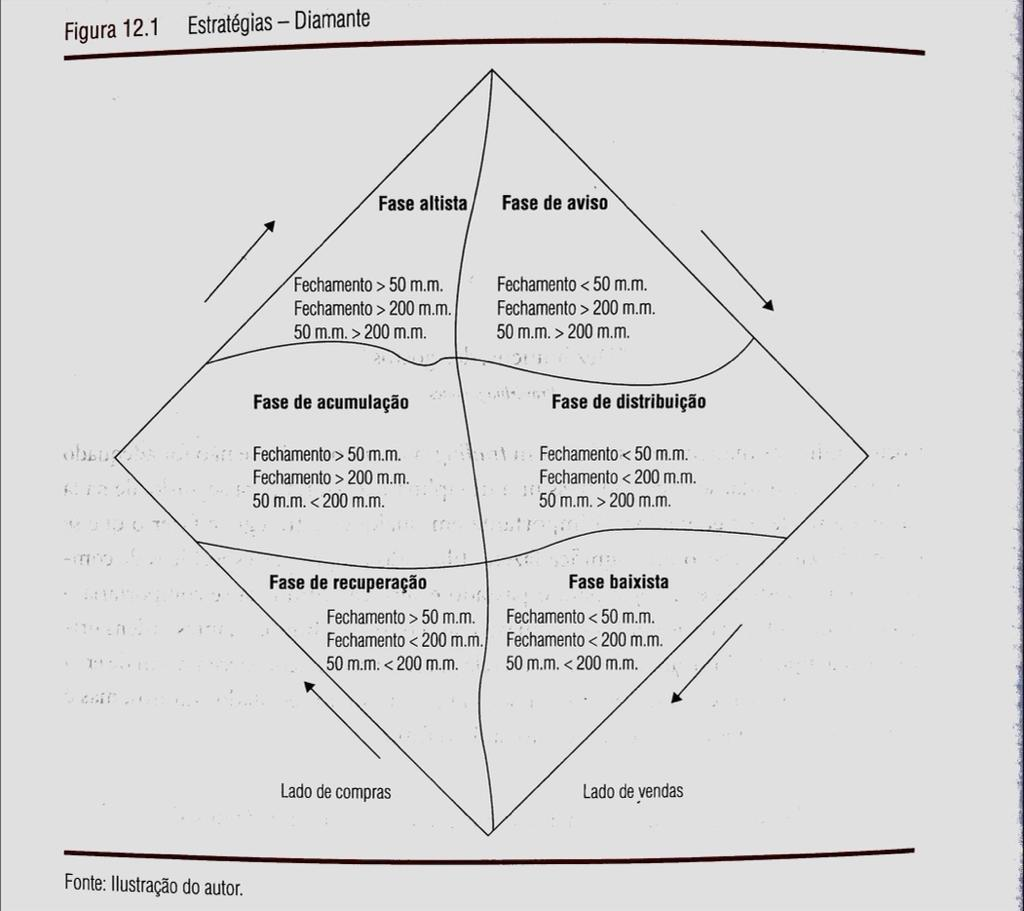


In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import yfinance as yf
import matplotlib.pyplot as plt

In [3]:
plt.style.use("fivethirtyeight")
# https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html

In [4]:
# Carrega a base
ticker = "ITSA4.SA"
df = yf.download(ticker, "2010-01-01", "2021-12-31")

df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,5.677845,5.901908,5.677845,5.897140,2.976795,11093298
2010-01-05,5.930511,5.940046,5.820864,5.878071,2.967172,10565325
2010-01-06,5.859002,5.906675,5.797027,5.806562,2.931075,10640630
2010-01-07,5.792260,5.811329,5.725518,5.773191,2.914227,8893307
2010-01-08,5.754122,5.792260,5.701681,5.730285,2.892569,9374713
...,...,...,...,...,...,...
2021-12-23,8.163636,8.200000,8.100000,8.172727,7.348298,13269410
2021-12-27,8.181818,8.263636,8.145454,8.263636,7.430037,16885330
2021-12-28,8.263636,8.318181,8.209090,8.254545,7.421865,13842180


In [5]:
# Cria as médias móveis para o diamante

p1 = 50
p2 = 200

df["MM_Curta"] = df["Adj Close"].rolling(window = p1).mean()
df["MM_Longa"] = df["Adj Close"].rolling(window = p2).mean()

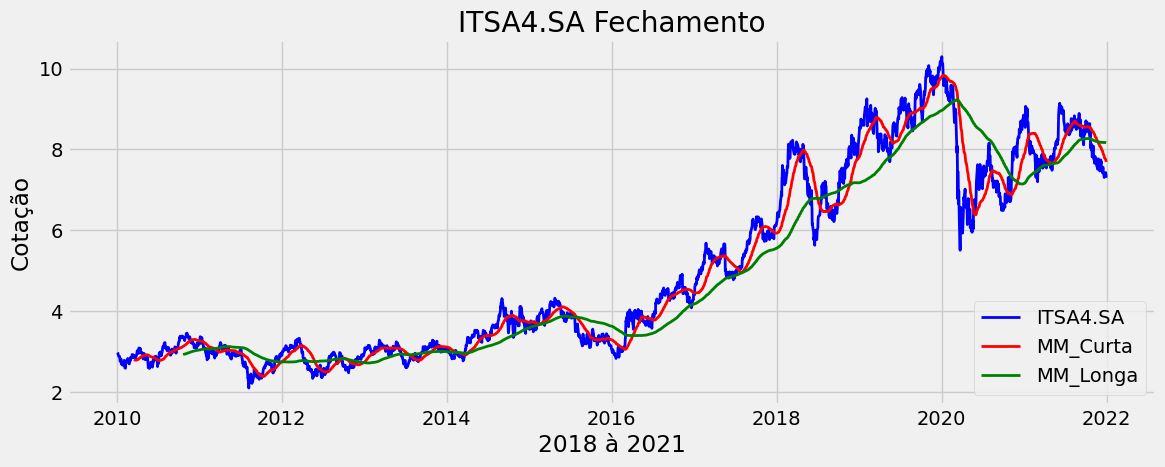

In [6]:
# Visualização

plt.figure(figsize=(12.5,4.5))
plt.plot(df["Adj Close"], label = ticker, linewidth = 2, color = "blue")
plt.plot(df["MM_Curta"], label = "MM_Curta", linewidth = 2, color = "red")
plt.plot(df["MM_Longa"], label = "MM_Longa", linewidth = 2, color = "green")
plt.title(ticker +  " Fechamento")
plt.xlabel("2018 à 2021")
plt.ylabel("Cotação")
plt.legend(loc = "lower right")
plt.show()

In [7]:
# Cria a lógica das 6 fases do diamante

#Fase de aviso
df["Diamante"] = np.where(
                        ((df["Adj Close"] < df["MM_Curta"]) # Condiçao 1
                         & (df["Adj Close"] > df["MM_Longa"]) # Condiçao 2
                         & (df["MM_Curta"] > df["MM_Longa"]) # Condiçao 3
                        )
                        , "Fase_Aviso", "Nada"
                        )

#Fase de Distribuição
df["Diamante"] = np.where(
                        ((df["Adj Close"] < df["MM_Curta"])
                         & (df["Adj Close"] < df["MM_Longa"])
                         & (df["MM_Curta"] > df["MM_Longa"])
                        )
                        , "Fase_Distribuição", df["Diamante"]
                        )

#Fase Baixista
df["Diamante"] = np.where(
                        ((df["Adj Close"] < df["MM_Curta"])
                         & (df["Adj Close"] < df["MM_Longa"])
                         & (df["MM_Curta"] < df["MM_Longa"])
                        )
                        , "Fase_Baixista", df["Diamante"]
                        )

#Fase de Recuperação 
df["Diamante"] = np.where(
                        ((df["Adj Close"] > df["MM_Curta"])
                         & (df["Adj Close"] < df["MM_Longa"])
                         & (df["MM_Curta"] < df["MM_Longa"])
                        )
                        , "Fase_Recuperação", df["Diamante"]
                        )

#Fase de Acumulação 
df["Diamante"] = np.where(
                        ((df["Adj Close"] > df["MM_Curta"])
                         & (df["Adj Close"] > df["MM_Longa"])
                         & (df["MM_Curta"] < df["MM_Longa"])
                        )
                        , "Fase_Acumulação", df["Diamante"]
                        )

#Fase de Altista
df["Diamante"] = np.where(
                        ((df["Adj Close"] > df["MM_Curta"])
                         & (df["Adj Close"] > df["MM_Longa"])
                         & (df["MM_Curta"] > df["MM_Longa"])
                        )
                        , "Fase_Altista", df["Diamante"]
                        )

In [8]:
# Ajustando a definição de "Lado de vendas" ou "Lado de compras"

df["Lado"] = np.where(
                        ((df["Diamante"] == "Fase_Recuperação")
                         | (df["Diamante"] == "Fase_Acumulação")
                         | (df["Diamante"] == "Fase_Altista")
                        )
                        , "Lado_de_Compras", "Lado_de_Vendas"
                        )

In [9]:
df.dropna(inplace = True)
df.tail()

,Open,High,Low,Close,Adj Close,Volume,MM_Curta,MM_Longa,Diamante,Lado
Date,,,,,,,,,,
2021-12-23,8.163636,8.200000,8.100000,8.172727,7.348298,13269410,7.784789,8.172638,Fase_Baixista,Lado_de_Vendas
2021-12-27,8.181818,8.263636,8.145454,8.263636,7.430037,16885330,7.763025,8.172168,Fase_Baixista,Lado_de_Vendas
2021-12-28,8.263636,8.318181,8.209090,8.254545,7.421865,13842180,7.743080,8.170625,Fase_Baixista,Lado_de_Vendas
2021-12-29,8.254545,8.281818,8.154545,8.209090,7.380996,14187910,7.719115,8.168989,Fase_Baixista,Lado_de_Vendas
2021-12-30,8.218181,8.236363,8.090909,8.118181,7.299256,25655080,7.692296,8.167245,Fase_Baixista,Lado_de_Vendas


In [10]:
# Construção dos alvos

# Alvo 1 - Retorno
df["Retorno"] = df["Adj Close"].pct_change(1)*100
df["Alvo1"] = df["Retorno"].shift(-1)

# Alvo 5 - Retorno
df["Retorno5"] = df["Adj Close"].pct_change(5)*100
df["Alvo5"] = df["Retorno5"].shift(-5)

# Alvo 10 - Retorno
df["Retorno10"] = df["Adj Close"].pct_change(10)*100
df["Alvo10"] = df["Retorno10"].shift(-10)

# Criacao dos alvos categoricos
df["Alvo1_cat"] = np.where(df["Alvo1"] > 0 , 1, 0)
df["Alvo5_cat"] = np.where(df["Alvo5"] > 0 , 1, 0)
df["Alvo10_cat"] = np.where(df["Alvo10"] > 0 , 1, 0)

In [11]:
# Qual é a média dos retornos dos dias sucessivos

np.round(pd.pivot_table(df, index = ["Lado", "Diamante"]
               , aggfunc = {"Alvo1_cat" : np.mean
                            , "Alvo5_cat": np.mean
                            , "Alvo10_cat": np.mean}), 3)*100

Alvo10_cat  Alvo1_cat  Alvo5_cat
Lado            Diamante                                           
Lado_de_Compras Fase_Acumulação          67.6       43.7       62.0
                Fase_Altista             49.6       47.3       50.2
                Fase_Recuperação         54.5       49.4       49.8
Lado_de_Vendas  Fase_Aviso               49.7       46.7       49.2
                Fase_Baixista            53.9       51.3       53.2
                Fase_Distribuição        49.2       53.3       50.0

In [12]:
# Adicionando tudo em uma função

def diamante(ticker, inicio, fim, media_curta, media_longa, alvo):
    df = yf.download(ticker, inicio, fim);
    df["MM_Curta"] = df["Adj Close"].rolling(window = media_curta).mean()
    df["MM_Longa"] = df["Adj Close"].rolling(window = media_longa).mean()
    # Cria a lógica das 6 fases do diamante

    #Fase de aviso
    df["Diamante"] = np.where(
                        ((df["Adj Close"] < df["MM_Curta"])
                         & (df["Adj Close"] > df["MM_Longa"])
                         & (df["MM_Curta"] > df["MM_Longa"])
                        )
                        , "1-Fase_Aviso", "Nada"
                        )

    #Fase de Distribuição
    df["Diamante"] = np.where(
                        ((df["Adj Close"] < df["MM_Curta"])
                         & (df["Adj Close"] < df["MM_Longa"])
                         & (df["MM_Curta"] > df["MM_Longa"])
                        )
                        , "2-Fase_Distribuição", df["Diamante"]
                        )

    #Fase Baixista
    df["Diamante"] = np.where(
                        ((df["Adj Close"] < df["MM_Curta"])
                         & (df["Adj Close"] < df["MM_Longa"])
                         & (df["MM_Curta"] < df["MM_Longa"])
                        )
                        , "3-Fase_Baixista", df["Diamante"]
                        )

    #Fase de Recuperação 
    df["Diamante"] = np.where(
                        ((df["Adj Close"] > df["MM_Curta"])
                         & (df["Adj Close"] < df["MM_Longa"])
                         & (df["MM_Curta"] < df["MM_Longa"])
                        )
                        , "1-Fase_Recuperação", df["Diamante"]
                        )

    #Fase de Acumulação 
    df["Diamante"] = np.where(
                        ((df["Adj Close"] > df["MM_Curta"])
                         & (df["Adj Close"] > df["MM_Longa"])
                         & (df["MM_Curta"] < df["MM_Longa"])
                        )
                        , "2-Fase_Acumulação", df["Diamante"]
                        )

    #Fase de Altista
    df["Diamante"] = np.where(
                        ((df["Adj Close"] > df["MM_Curta"])
                         & (df["Adj Close"] > df["MM_Longa"])
                         & (df["MM_Curta"] > df["MM_Longa"])
                        )
                        , "3-Fase_Altista", df["Diamante"]
                        )
    df["Lado"] = np.where(
                        ((df["Diamante"] == "1-Fase_Recuperação")
                         | (df["Diamante"] == "2-Fase_Acumulação")
                         | (df["Diamante"] == "3-Fase_Altista")
                        )
                        , "Lado_de_Compras", "Lado_de_Vendas"
                        )
    df.dropna(inplace = True)
    # Construção do alvo
    df["Retorno"] = df["Adj Close"].pct_change(alvo)
    df["Alvo"] = df["Retorno"].shift(-alvo)
    # Criacao do alvo categórico
    df["Alvo_cat"] = np.where(df["Alvo"] > 0 , 1, 0)
    pivot = np.round(pd.pivot_table(df, index = ["Lado", "Diamante"]
               , aggfunc = {"Alvo" : np.mean
                            , "Alvo_cat": np.mean}), 3)*100
    status = " \n Última fase: " + df["Diamante"].iloc[-1]
    analise = "Análise para " + ticker + " de " + inicio + " à " + fim
    alvo_p = "Alvo de " + str(alvo) + " dias"
    return print( "\n" + analise), print( "\n" + alvo_p), print(pivot), print(status)

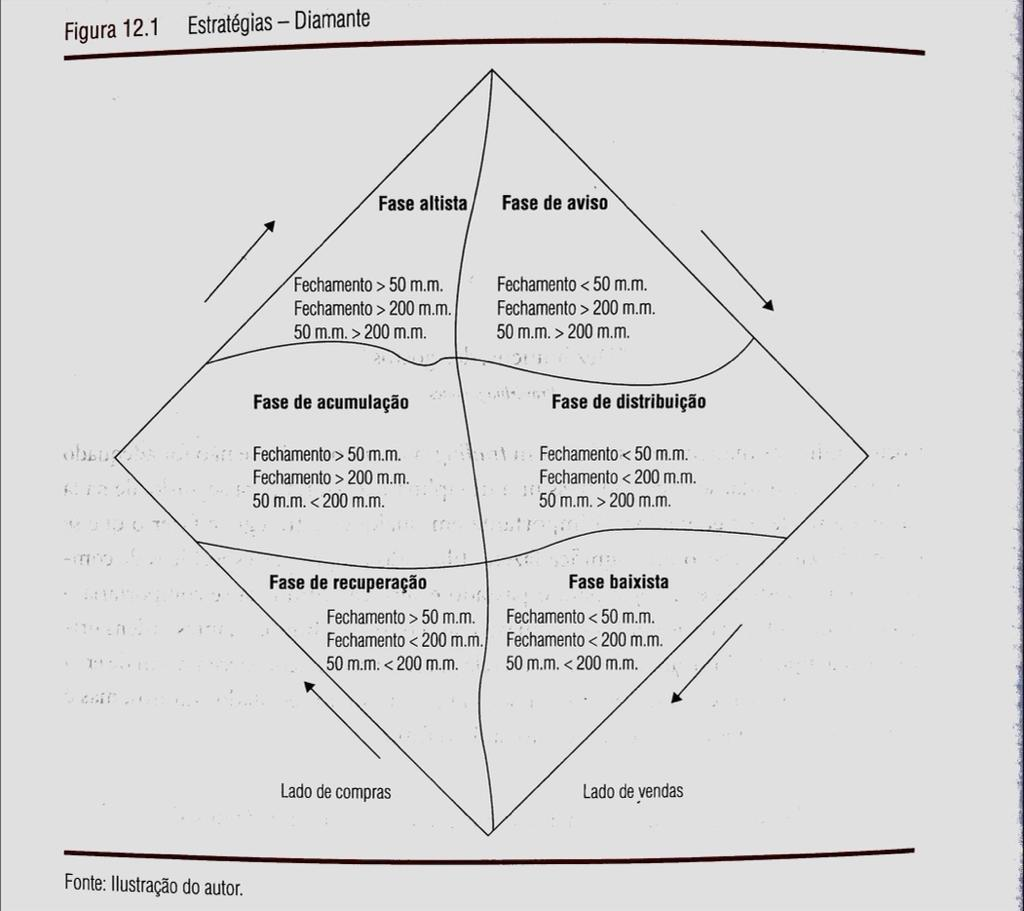


In [13]:
diamante("BBAS3.SA", "2005-01-01", "2022-12-31", 50, 200, 15)

[*********************100%%**********************]  1 of 1 completed

Análise para BBAS3.SA de 2005-01-01 à 2022-12-31

Alvo de 15 dias
                                     Alvo  Alvo_cat
Lado            Diamante                           
Lado_de_Compras 1-Fase_Recuperação    2.0      55.6
                2-Fase_Acumulação     2.7      66.0
                3-Fase_Altista        0.4      51.6
Lado_de_Vendas  1-Fase_Aviso         -0.3      45.2
                2-Fase_Distribuição  -1.0      45.3
                3-Fase_Baixista       3.1      58.5
 
 Última fase: 3-Fase_Baixista


(None, None, None, None)